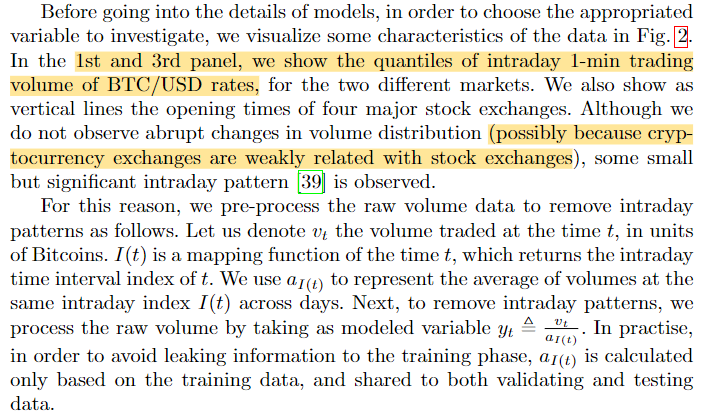

- We only care about how much it deviates from the "usual value"

In [1]:
import sys
from pathlib import Path

# Add the parent directory of the notebook to the Python path
sys.path.append(str(Path().resolve().parent))

In [2]:
from funcs.data_read import (
    read_txn_data, 
    read_ob_data,
)

from funcs.preprocess import (
    preprocess_ob_data, 
    preprocess_trx_data,
)

from funcs.features import (
    create_features_order_book,
    create_features_trx,
)

from funcs.utils import (
    filter_extremes,
)


In [3]:
df=read_ob_data(test=True,test_size=2)
df2=read_txn_data(test=True,test_size=2)

Processing 2 file(s): ['C:\\Users\\peter\\codes\\ml\\eth\\Komplex\\data\\bitstamp_ob_04_07_2018.zip', 'C:\\Users\\peter\\codes\\ml\\eth\\Komplex\\data\\bitstamp_ob_04_08_2018.zip']
Processing bitstamp_ob_04_07_2018.zip...
Processing bitstamp_ob_04_08_2018.zip...
Finished loading. Total rows: 49,188,752


In [4]:
df2

,timestamp,price,datetime,cost,id,fee,fee1,order,symbol,amount,type,side
0,1527800413000,7538.34,2018-05-31 21:00:13+00:00,75.383400,67405327,{'currency': u'USD','cost': None},None,BTC/USD,0.010000,None,sell
1,1527800418000,7533.92,2018-05-31 21:00:18+00:00,35.761333,67405331,{'currency': u'USD','cost': None},None,BTC/USD,0.004747,None,sell
2,1527800418000,7535.44,2018-05-31 21:00:18+00:00,2995.337400,67405330,{'currency': u'USD','cost': None},None,BTC/USD,0.397500,None,sell
3,1527800418000,7536.00,2018-05-31 21:00:18+00:00,7.536000,67405329,{'currency': u'USD','cost': None},None,BTC/USD,0.001000,None,sell
4,1527800418000,7537.49,2018-05-31 21:00:18+00:00,753.749000,67405328,{'currency': u'USD','cost': None},None,BTC/USD,0.100000,None,sell
...,...,...,...,...,...,...,...,...,...,...,...,...
38012,1530482339000,6368.23,2018-07-01 21:58:59+00:00,1195.936463,69418422,{'currency': u'USD','cost': None},None,BTC/USD,0.187797,None,buy
38013,1530482339000,6366.91,2018-07-01 21:58:59+00:00,6.366910,69418421,{'currency': u'USD','cost': None},None,BTC/USD,0.001000,None,buy
38014,1530482372000,6360.96,2018-07-01 21:59:32+00:00,2856.608986,69418430,{'currency': u'USD','cost': None},None,BTC/USD,0.449085,None,sell
38015,1530482372000,6360.96,2018-07-01 21:59:32+00:00,6312.262653,69418429,{'currency': u'USD','cost': None},None,BTC/USD,0.992344,None,sell


In [5]:
preprocess_trx_data=preprocess_trx_data(df2,"30min")
preprocess_ob_data=preprocess_ob_data(df,freq="30min")

C:\Users\peter\codes\ml\eth\Komplex\gitfolder_2\funcs\preprocess.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['side'] = df['side'].astype(str).str.strip().str.lower()
C:\Users\peter\codes\ml\eth\Komplex\gitfolder_2\funcs\preprocess.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['side'] = df['side'].replace(side_mapping)


Side column standardized successfully.
Timestamp ID created successfully.
TRX data resampled to 30min frequency - 38017 transactions grouped into common time windows
Missing values handled successfully.
TRX Data Preprocessed Successfully.
Timestamp ID created successfully.
Resampled OB data to 30min frequency. Selected 819746 rows.
Missing values handled successfully.
OB Data Preprocessed Successfully.


# OB DATA

In [6]:
ob_features=create_features_order_book(preprocess_ob_data)

In [7]:
ob_features

,timestamp_id,datetime,mid_price,spread,ask_volume,bid_volume,volume_imbalance,ask_slope_10pct,ask_slope_1pct,ask_slope_5pct,bid_slope_10pct,bid_slope_1pct,bid_slope_5pct,slope_imbalance_10pct,slope_imbalance_1pct,slope_imbalance_5pct
0,1530656974,2018-07-03 22:29:34+00:00,6582.945,7.33,2492.879560,567122.752372,564629.872812,1006.593501,259.090451,821.287488,1760.855336,295.099951,1012.063944,754.261835,36.009501,190.776456
1,1530658774,2018-07-03 22:59:34+00:00,6473.960,7.72,2647.189662,567307.290975,564660.101313,1122.806916,257.149918,748.511940,2094.410000,603.797694,1090.827367,971.603084,346.647776,342.315427
2,1530660574,2018-07-03 23:29:34+00:00,6490.220,7.48,2640.914406,567265.459261,564624.544855,1112.568060,284.494882,853.478513,2037.080195,317.315860,1030.351555,924.512135,32.820978,176.873041
3,1530662373,2018-07-03 23:59:33+00:00,6500.665,5.29,2623.431644,567351.559437,564728.127793,1128.798246,314.857250,838.594997,2103.308597,381.381383,1105.928424,974.510351,66.524133,267.333427
4,1530664173,2018-07-04 00:29:33+00:00,6472.335,4.67,2634.134949,567265.059118,564630.924168,1109.848615,314.406422,736.626912,2054.139548,604.826516,1053.107496,944.290933,290.420094,316.480584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1533412774,2018-08-04 19:59:34+00:00,6986.295,2.89,3542.193671,609259.465309,605717.271638,886.462912,232.912358,562.846981,1685.184826,292.364992,1215.475233,798.721914,59.452634,652.628253
92,1533414573,2018-08-04 20:29:33+00:00,6983.975,0.01,3528.971678,609282.308850,605753.337172,875.368231,228.075369,554.081967,1740.351676,298.609383,1242.107428,864.983445,70.534014,688.025461
93,1533416374,2018-08-04 20:59:34+00:00,6980.350,2.94,3532.068724,609703.352496,606171.283772,892.809413,237.011547,566.682394,2140.138751,301.013699,1640.923931,1247.329338,64.002152,1074.241537
94,1533418174,2018-08-04 21:29:34+00:00,6999.210,0.96,3485.545610,609704.171247,606218.625637,862.509720,227.531603,541.533379,2124.820068,291.381823,1632.868679,1262.310347,63.850219,1091.335300


# TRX 

In [9]:
trx_features=create_features_trx(preprocess_trx_data)

In [10]:
trx_features

,timestamp_id,datetime,first_price,last_price,max_price,min_price,buy_volume,sell_volume,volume_imbalance,buy_transactions,sell_transactions,transaction_imbalance
0,1527800400,2018-05-31 21:00:00+00:00,7538.34,7559.04,7565.99,7530.45,91.819882,74.737348,17.082534,286.0,131.0,155.0
1,1527802200,2018-05-31 21:30:00+00:00,7559.00,7545.69,7564.84,7539.15,35.034741,18.774873,16.259868,358.0,62.0,296.0
2,1527804000,2018-05-31 22:00:00+00:00,7539.14,7450.22,7546.42,7412.57,240.849659,357.281248,-116.431589,642.0,498.0,144.0
3,1527805800,2018-05-31 22:30:00+00:00,7454.19,7450.91,7460.69,7426.00,60.996226,45.987042,15.009184,248.0,113.0,135.0
4,1527807600,2018-05-31 23:00:00+00:00,7443.28,7481.52,7487.25,7435.14,80.507658,38.586301,41.921357,193.0,123.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1530473400,2018-07-01 19:30:00+00:00,6297.58,6320.77,6324.31,6297.55,22.503260,1.159961,21.343298,70.0,29.0,41.0
96,1530475200,2018-07-01 20:00:00+00:00,6314.75,6355.99,6363.99,6303.99,55.983565,9.353571,46.629995,120.0,46.0,74.0
97,1530477000,2018-07-01 20:30:00+00:00,6365.34,6342.43,6409.46,6342.43,153.966583,138.254224,15.712359,358.0,271.0,87.0
98,1530478800,2018-07-01 21:00:00+00:00,6342.53,6344.78,6356.12,6333.63,42.828013,56.104769,-13.276756,123.0,102.0,21.0
